In [ ]:
%pip install ifcopenshell -U
%pip install openpyxl -U
%pip install pandas -U
%pip install lark -U
%pip install wordcloud -U

In [8]:
import ifcopenshell
import ifcopenshell.util
import ifcopenshell.util.element
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = r"2022020320211122Wellness center Sama.ifc"
ifc_file = ifcopenshell.open(file_path)
ifc_file

In [4]:
# get all classes
classes = ifc_file.by_type("IfcProduct")
# print all class name
class_names = [class_name.is_a() for class_name in classes]
class_names = list(set(class_names))
class_names.sort()
class_names

['IfcBuilding',
 'IfcBuildingElementProxy',
 'IfcBuildingStorey',
 'IfcColumn',
 'IfcCurtainWall',
 'IfcDistributionPort',
 'IfcDoor',
 'IfcFlowTerminal',
 'IfcFurnishingElement',
 'IfcMember',
 'IfcOpeningElement',
 'IfcPlate',
 'IfcRailing',
 'IfcRamp',
 'IfcSite',
 'IfcSlab',
 'IfcStair',
 'IfcStairFlight',
 'IfcWallStandardCase',
 'IfcWindow']

In [9]:
file_name = "result.xlsx"
with pd.ExcelWriter(file_name, engine='openpyxl') as writer:
    for class_name in class_names:
        objects = ifc_file.by_type(class_name)
        result_df = pd.DataFrame()
        for object in objects:
            class_data = {}
            # get dict of properties and values
            ifcopenshell.util.element
            psets  = ifcopenshell.util.element.get_psets(object)
            for name, value in psets.items():
                if isinstance(value, dict):
                    for key, val in value.items():
                        class_data[key] = val
                else:
                    pass
            class_df =  pd.DataFrame(class_data, index=[0])
            result_df = pd.concat([result_df, class_df], ignore_index=True)
        if(result_df.empty):
            continue
        result_df.to_excel(writer, sheet_name=class_name, index=False)
        # set auto fit column width
        worksheet = writer.sheets[class_name]
        for idx, col in enumerate(worksheet.columns):
            worksheet.column_dimensions[col[0].column_letter].width = 20


In [10]:
# read excel 
df = pd.read_excel(file_name, sheet_name=None)
list(df.keys())

['IfcBuilding',
 'IfcBuildingElementProxy',
 'IfcBuildingStorey',
 'IfcColumn',
 'IfcCurtainWall',
 'IfcDoor',
 'IfcFlowTerminal',
 'IfcFurnishingElement',
 'IfcMember',
 'IfcOpeningElement',
 'IfcPlate',
 'IfcRailing',
 'IfcRamp',
 'IfcSite',
 'IfcSlab',
 'IfcStair',
 'IfcStairFlight',
 'IfcWallStandardCase',
 'IfcWindow']

In [11]:
# show data IfcDoor
df['IfcDoor'].head(20)

,LiningOffset,id,PanelOperation,PanelPosition,IsExternal,Reference,Category,ThermalTransmittance
0,12.7,76119,SWINGING,NOTDEFINED,True,my door,Doors,NaN
1,NaN,76274,SWINGING,NOTDEFINED,False,0813 x 2134mm,Doors,3.702100
2,NaN,76314,SWINGING,NOTDEFINED,False,0813 x 2134mm,Doors,3.702100
3,NaN,76424,SWINGING,NOTDEFINED,False,0813 x 2134mm,Doors,3.702100
4,NaN,76658,NOTDEFINED,NOTDEFINED,False,my door 2,Doors,3.128723
5,NaN,216289,SWINGING,NOTDEFINED,False,"24"" x 80""",Doors,NaN
6,NaN,216412,SWINGING,NOTDEFINED,False,0762 x 2032mm,Doors,3.702100
7,NaN,265930,SWINGING,NOTDEFINED,False,0762 x 2032mm,Doors,3.702100
8,NaN,266247,NOTDEFINED,NOTDEFINED,False,showers,Doors,3.128723
9,NaN,266294,NOTDEFINED,NOTDEFINED,False,showers,Doors,3.128723


Exception ignored in: <function ZipFile.__del__ at 0x102376de0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/zipfile/__init__.py", line 1940, in __del__
    self.close()
  File "/opt/anaconda3/lib/python3.12/zipfile/__init__.py", line 1957, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


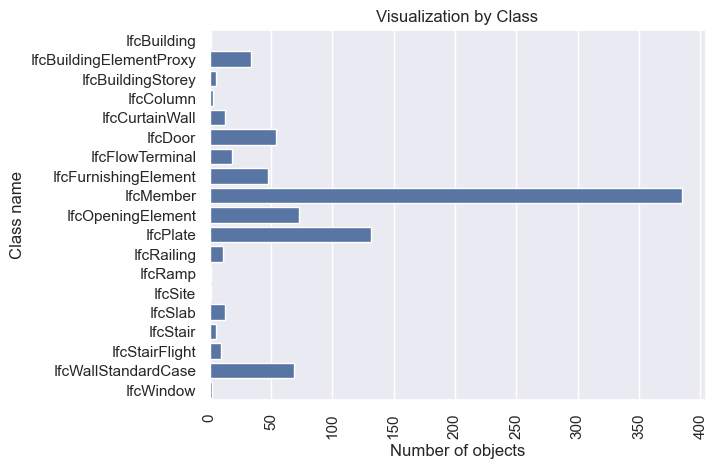

In [12]:
# Visualization by categories 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
# visualize data df dictionary, y is class name, x is number of objects
sns.barplot(y=list(df.keys()), x=[len(df[key]) for key in df.keys()])
plt.xticks(rotation=90)
plt.ylabel("Class name")
plt.xlabel("Number of objects")
plt.title("Visualization by Class")
plt.show()

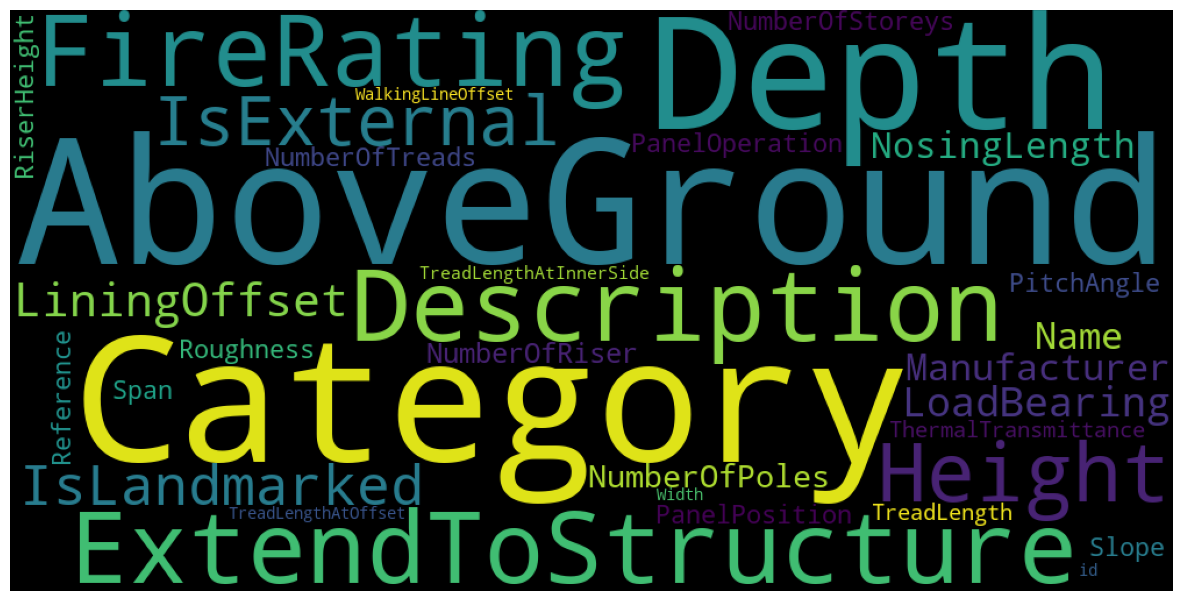

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
all_properties = []
for key in df.keys():
    all_properties.extend(df[key].columns)
all_properties = list(set(all_properties))
all_properties.sort()
# create word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_properties))
# plot the WordCloud image
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()